In [1]:
#What is the shape of "movies.csv"?
import pandas as pd
movies = pd.read_csv("movies.csv")
print(movies.shape)

(9742, 3)


In [2]:
#What is the shape of "ratings.csv"?
import pandas as pd
ratings = pd.read_csv("ratings.csv")
print(ratings.shape)

(100836, 4)


In [3]:
#How many unique "userId" are available in "ratings.csv"?
import pandas as pd
ratings = pd.read_csv("ratings.csv")
print(ratings["userId"].nunique())

610


In [5]:
#Which movie name has recieved maximum number of user ratings?
import pandas as pd
ratings = pd.read_csv("ratings.csv")
print(ratings["movieId"].value_counts())

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64


In [6]:
##Which movie name has recieved maximum number of user ratings?
import pandas as pd
ratings = pd.read_csv("ratings.csv")
print(ratings["movieId"].value_counts())

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64


In [7]:
import pandas as pd
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies[movies["movieId"]==356]["title"].unique()


array(['Forrest Gump (1994)'], dtype=object)

In [ ]:
#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [9]:
#load tags.csv
import pandas as pd
tags = pd.read_csv("tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
#movie id of ""Matrix, The (1999)"
movies[movies["title"]=="Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [11]:
#the tag of the movie id 2571
tags[tags["movieId"]==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [ ]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [12]:
movies[movies["title"]=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [14]:
#what is the average rating of movie id 589
ratings[ratings["movieId"]==589]["rating"].mean()

3.970982142857143

In [ ]:
#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


In [15]:
movies[movies["title"]=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


<Axes: xlabel='rating'>

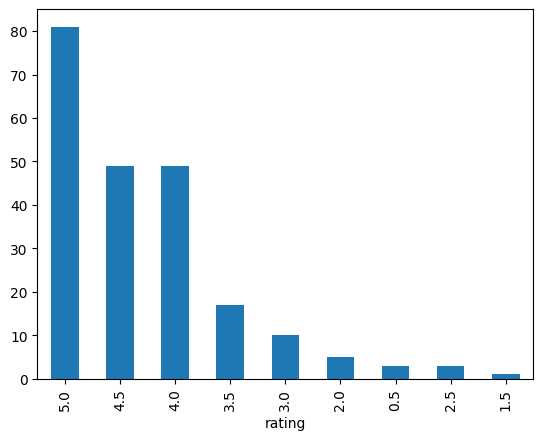

In [18]:
#the histogram distribution of user rating for 2959
fight_club =ratings[ratings["movieId"]==2959]["rating"].value_counts()
fight_club.plot(kind="bar")

In [20]:
#Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
groupby_movieid = ratings.groupby("movieId")
group = groupby_movieid["rating"].agg(["count","mean"])
group


,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [23]:

#Mandatory Operations:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

groupby_movieid = ratings.groupby("movieId")
group = groupby_movieid["rating"].agg(["count","mean"])
group



,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [25]:
#Apply inner join on dataframe created from movies.csv and the group dataframe.
import pandas as pd
movies = pd.read_csv("movies.csv")
inner_join = pd.merge(movies,group,on="movieId")
inner_join

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [27]:
#Filter only those movies which have more than 50 user ratings (i.e. > 50) from the inner_join.
filter = inner_join[inner_join["count"]>50]
filter

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [28]:
#Which movie is the most popular based on  average user ratings?
filter[filter["mean"]==filter["mean"].max()]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


In [29]:
#which comes under top 5 popular movies based on number of user ratings.
filter.sort_values(by="count",ascending=False).head()

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [31]:
#Which Sci-Fi movie is "third most popular" based on the number of user ratings
filter[filter["genres"].str.contains("Sci-Fi")].sort_values(by="count",ascending=False)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [33]:
#Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings.
scrape_imdb = pd.read_csv("links.csv")
scrape_imdb = scrape_imdb[scrape_imdb["movieId"]>50]
scrape_imdb

,movieId,imdbId,tmdbId
47,52,113819,11448.0
48,53,110299,49133.0
49,54,112499,26441.0
50,55,113158,97406.0
51,57,113321,9089.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [34]:
#Mention the movieId of the movie which has the highest IMDB rating.
scrape_imdb[scrape_imdb["imdbId"]==scrape_imdb["imdbId"].max()]

,movieId,imdbId,tmdbId
9740,193587,8391976,483455.0


In [37]:
join_imdb = pd.merge(movies,scrape_imdb,on="movieId")
join_imdb

,movieId,title,genres,imdbId,tmdbId
0,52,Mighty Aphrodite (1995),Comedy|Drama|Romance,113819,11448.0
1,53,Lamerica (1994),Adventure|Drama,110299,49133.0
2,54,"Big Green, The (1995)",Children|Comedy,112499,26441.0
3,55,Georgia (1995),Drama,113158,97406.0
4,57,Home for the Holidays (1995),Drama,113321,9089.0
...,...,...,...,...,...
9690,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9691,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9692,193585,Flint (2017),Drama,6397426,479308.0
9693,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


In [39]:
#Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating in the join_imbd.
sci_fi = join_imdb[join_imdb["genres"].str.contains("Sci-Fi")]["imdbId"].max()
sci_fi_title = join_imdb[join_imdb["imdbId"]==sci_fi]["title"]
sci_fi_title


,title
9583,2048: Nowhere to Run (2017)


In [ ]:
#view genre of